In [106]:
#print(E_sublead,\
#     (mH**2 - W_leading.M2()), (W_sublead_m**2) ,( 2*lepton.Dot(W_leading)),\
#     E_leading,W_sublead_m**2)

print(f"Higgs mass={mH}\nNu eta={nu_eta}\nsub W mass={W_sublead_m}")
print("A={:.8f}\nB={:.8f}\nC={:.8f}\nD={:.8f}\nF={:.8f}\nK={:.8f}\nL={:.8f}\ncc={:.4f}".format(A,B,C,D,F,K,L,cc))
print("Det   = {:.8f}".format(D**2 - 4*C*F))
print("Det 1 = {:.8f}".format(D1**2 - 4*C*F1))

print(SubleadNu.at[evtid,'py'])
print((-D + np.sqrt(D**2 - 4*C*F))/(2*C))
print((-D1 + np.sqrt(D1**2 - 4*C*F1))/(2*C))
print((-D - np.sqrt(D**2 - 4*C*F))/(2*C))
print((-D1 - np.sqrt(D1**2 - 4*C*F1))/(2*C))

Higgs mass=125.017007812
Nu eta=1.914047
sub W mass=26.441302734
A=0.20694465
B=0.94148769
C=1.04277442
D=0.41156245
F=-1.43251538
K=1.52279823
L=-0.00718768
cc=62431.3327
Det   = 6.14454524
Det 1 = 6.14455767
-0.396059174
0.9912291775885652
0.9912306813300122
-1.3859094121941506
-1.3859103114646982


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import seaborn as sns
import scipy as sp
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import my_files as mf
import my_vectors as mv

filepath = '../Updated signal features/npz files/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Updated signal features/npz files/LeptonP.npz
../Updated signal features/npz files/WmBoson.npz
../Updated signal features/npz files/LpNu.npz
../Updated signal features/npz files/WpBoson.npz
../Updated signal features/npz files/MET.npz
../Updated signal features/npz files/CGLMP.npz
../Updated signal features/npz files/LeadLepton.npz
../Updated signal features/npz files/LmNu.npz
../Updated signal features/npz files/Higgs.npz
../Updated signal features/npz files/subLeadLepton.npz
../Updated signal features/npz files/xi_xyz.npz
../Updated signal features/npz files/LeptonM.npz
../Updated signal features/npz files/diLepton.npz


In [3]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(f):
    W = 1 if j == 'phi' else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.vinv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vvec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [356]:
sigma_x = np.std(MET['px'])
sigma_y = np.std(MET['py'])
mH = 125
#mH = Higgs.at[evtid,'m'] # Higgs mass
#nu_eta = SubleadNu.at[evtid,'eta'] # scan parameter (store truth value)
#W_sublead_m = SubleadW.at[evtid,'m'] g# scan parameter (store truth value)

def solve_neutrino(evtid, nu_eta, W_sublead_m):
    lepton = mv.LorentzVector(Sublead.at[evtid,'px'],\
                             Sublead.at[evtid,'py'],\
                             Sublead.at[evtid,'pz'],\
                             Sublead.at[evtid,'E' ]) # leptonically decaying side

    W_leading = mv.LorentzVector(LeadingW.at[evtid,'px'],\
                                 LeadingW.at[evtid,'py'],\
                                 LeadingW.at[evtid,'pz'],\
                                 LeadingW.at[evtid,'E' ]) # hadronically decaying side
    E_sublead = lepton.E()*np.cosh(nu_eta) - lepton.Pz()*np.sinh(nu_eta)
    E_leading = W_leading.E()*np.cosh(nu_eta) - W_leading.Pz()*np.sinh(nu_eta)
    A = (lepton.Py()*E_leading - W_leading.Py()*E_sublead)
    A = A/(W_leading.Px()*E_sublead - lepton.Px()*E_leading)
    L = (A*lepton.Px() + lepton.Py())/E_sublead
    C = A**2 + 1 - L**2
    cc = (2*(lepton.Px()*E_leading - W_leading.Px()*E_sublead))
    B = (E_sublead*(mH**2 - W_leading.M2() - W_sublead_m**2 - 2*lepton.Dot(W_leading))) - E_leading*W_sublead_m**2
    B = B/cc
    K = (W_sublead_m**2/2 + lepton.Px()*B)/E_sublead
    #D = 2*(A*B - K*L)
    D = 2*(A*B - K*L + A*(lepton.M2()*E_leading/cc) - L*(lepton.M2()*W_leading.Px()/cc))
    #F = B**2 - K**2
    F = (B + (lepton.M2()*E_leading/cc))**2 - (K + (lepton.M2()*W_leading.Px()/cc))**2
    DET = D**2 - 4*C*F
    if DET == 0:
        y = (-D/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol = np.array([(x,y)])
    elif DET < 0:
        sol = np.array([(-99999,-99999)])
    elif DET > 0:
        y = ((-D + np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_1 = (x,y)
        y = ((-D - np.sqrt(DET))/(2*C))
        x = B + (lepton.M2()*E_leading/cc) + A*y 
        sol_2 = (x,y)
        sol = np.array([sol_1, sol_2])
    return sol    
    
def calculate_weight(evtid, solutions):
    MET_px = MET.at[evtid, 'px'] - LeadingNu.at[evtid, 'px']
    MET_py = MET.at[evtid, 'py'] - LeadingNu.at[evtid, 'py']
    #MET_px = SubleadNu.at[evtid, 'px']
    #MET_py = SubleadNu.at[evtid, 'py']
    tmp = -99999
    for i,a in enumerate(solutions):
        if a[0] == -99999:
            hist_weight = -1
            #print("Negative determinant")
        else:
            #w = np.exp(-((a[0] - MET_px)/(2*sigma_x))**2)*np.exp(-((a[-1] - MET_py)/(2*sigma_y))**2)
            w = np.exp(-((a[0] - MET_px))**2)*np.exp(-((a[-1] - MET_py))**2)
            hist_weight = max(w, tmp)
            tmp = w
            #print("weight {}: {:.4f}".format(i,w))
    return hist_weight



In [454]:
%%time
S = solve_neutrino(evt_id,y,x)
print(S)
W = calculate_weight(evt_id,solutions)
print(W)

[[-99999 -99999]]
-1
CPU times: user 831 µs, sys: 0 ns, total: 831 µs
Wall time: 773 µs


In [458]:
%%time
evt_id = np.random.choice(len(Higgs['E']))
#evt_id = 236469
N_div = 1000
nu_eta_bin = np.linspace(-5,5,N_div)
W_sublead_m_bin = np.linspace(0,100,N_div)
grid_x, grid_y = np.meshgrid(W_sublead_m_bin,nu_eta_bin)
grid_w = np.zeros((N_div,N_div))
for i,y in enumerate(nu_eta_bin):
    for j,x in enumerate(W_sublead_m_bin):
        solutions = solve_neutrino(evt_id,y,x)
        grid_w[i,j] = calculate_weight(evt_id,solutions)
j,i = np.unravel_index(grid_w.argmax(),grid_w.shape)
grid_weight = grid_w
grid_weight[j,i] = -1*grid_w[j,i]
l,k= np.unravel_index(grid_weight.argmax(),grid_weight.shape) 

CPU times: user 42 s, sys: 3.63 ms, total: 42 s
Wall time: 42 s


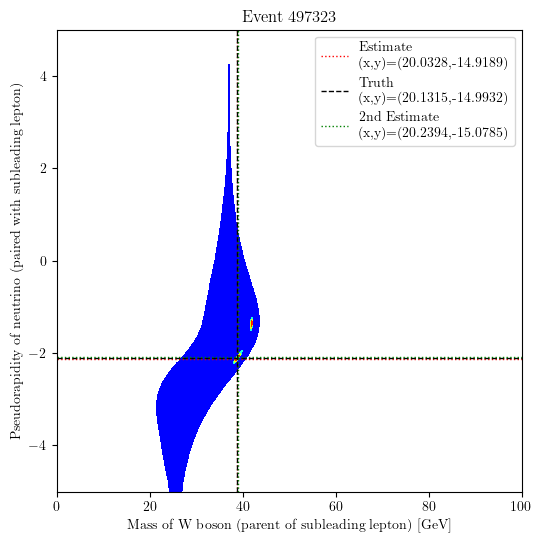

In [459]:
#meshgrid
'''
    |--------------------> x axis
    |z[i,j] = [[00,01,02],
    |          [10,11,12],
    |          [20,21,22]]
    V
  y axis

[y,x] <--> (x,y)
array[i,j] = x 
numpy unravel_index of element x returns j,i 
'''
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title(f"Event {evt_id}")
ax.set_xlabel("Mass of W boson (parent of subleading lepton) [GeV]")
ax.set_ylabel("Pseudorapidity of neutrino (paired with subleading lepton)")
ax.contourf(grid_x, grid_y, grid_w, cmap=my_cmap, vmin=0)
sol = solve_neutrino(evt_id,nu_eta_bin[j],W_sublead_m_bin[i])
if len(sol) == 1:
    x,y = sol
elif len(sol) > 1:
    x,y = sol[0] if calculate_weight(evt_id,[sol[0]]) > calculate_weight(evt_id,[sol[1]]) else sol[1]
    
else:
    x,y = 'n/a','n/a'
ax.axvline(W_sublead_m_bin[i], ls='dotted', c='r', lw=1, label='Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
ax.axhline(nu_eta_bin[j], ls='dotted', c='r', lw=1)
ax.axvline(SubleadW.at[evt_id,'m'], ls='dashed', c='k', lw=1, label='Truth\n(x,y)=({:.4f},{:.4f})'.format(SubleadNu.at[evt_id,'px'],SubleadNu.at[evt_id,'py']))
ax.axhline(SubleadNu.at[evt_id, 'eta'], ls='dashed', c='k', lw=1)
##### 2nd greatest weight #####

sol = solve_neutrino(evt_id,nu_eta_bin[l],W_sublead_m_bin[k])
if len(sol) == 1:
    x,y = sol
elif len(sol) > 1:
    x,y = sol[0] if calculate_weight(evt_id,[sol[0]]) > calculate_weight(evt_id,[sol[1]]) else sol[1]
    
else:
    x,y = 'n/a','n/a'
#ax.axline([W_sublead_m_bin[k],nu_eta_bin[l]],slope=0.1, ls='dotted', c='g', lw=1, label='2nd Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
#ax.axline([W_sublead_m_bin[k],nu_eta_bin[l]],slope=-0.1, ls='dotted', c='g', lw=1)
ax.axvline(W_sublead_m_bin[k], ls='dotted', c='g', lw=1, label='2nd Estimate\n(x,y)=({:.4f},{:.4f})'.format(x,y))
ax.axhline(nu_eta_bin[l], ls='dotted', c='g', lw=1)
ax.legend()
plt.show()

In [450]:
selection = np.where(diNeutrino['m2'] >= 0, True, False)
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(6,6))
ax.hist2d()





(array([False,  True]), array([      3, 2928859]))

In [385]:
print(sol)
w1 = (calculate_weight(evt_id,[sol[0]]))
w2 = (calculate_weight(evt_id,[sol[1]]))

j,i = np.unravel_index(grid_w.argmax(),grid_w.shape)
print(j,i)
print(W_sublead_m_bin[i],nu_eta_bin[j],grid_w[j,i])
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j+1,i-1],grid_w[j+1,i],grid_w[j+1,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j  ,i-1],grid_w[j  ,i],grid_w[j  ,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_w[j-1,i-1],grid_w[j-1,i],grid_w[j-1,i+1]))
grid_weight = grid_w
grid_weight[j,i] = -1*grid_w[j,i]
j,i = np.unravel_index(grid_weight.argmax(),grid_weight.shape)
print(j,i)
print(W_sublead_m_bin[i],nu_eta_bin[j],grid_weight[j,i])
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j+1,i-1],grid_weight[j+1,i],grid_weight[j+1,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j  ,i-1],grid_weight[j  ,i],grid_weight[j  ,i+1]))
print('{:.2f}.{:.2f}.{:.2f}'.format(grid_weight[j-1,i-1],grid_weight[j-1,i],grid_weight[j-1,i+1]))

[[-19.2548859   -4.86630112]
 [-15.06086506 -15.12593184]]
453 97
9.70970970970971 -0.4654654654654653 0.9549324037050829
0.89.0.78.0.62
0.95.0.95.0.85
0.81.-0.96.-0.99
453 96
9.60960960960961 -0.4654654654654653 0.9498475192443986
0.91.0.89.0.78
0.83.0.95.-0.95
0.58.0.81.-0.96


In [4]:
%%time
Plead = np.where(LeptonP['pt']>LeptonM['pt'], True, False)
Mlead = np.where(LeptonP['pt']<LeptonM['pt'], True, False)
Leading = mf.load_particle('LeadLepton.npz', None, GeV)
Sublead = mf.load_particle('subLeadLepton.npz', None, GeV)
WPlead = np.where(LeptonP['pt']>LeptonM['pt'], True, False)
WMlead = np.where(LeptonP['pt']<LeptonM['pt'], True, False)
LeadingW = WBosonP[Plead].combine_first(WBosonM[Mlead])
SubleadW = WBosonP[Mlead].combine_first(WBosonM[Plead])
LeadingNu = NeutrinoP[Plead].combine_first(NeutrinoM[Mlead])
SubleadNu = NeutrinoP[Mlead].combine_first(NeutrinoM[Plead])

Loaded E from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from subLeadLepton.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862

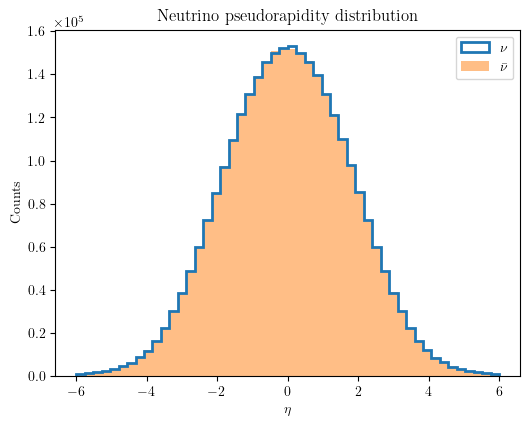

In [209]:
s = 1.5
p,q = 1,1
fig, ax = plt.subplots(nrows=p, ncols=q, figsize = (4*s*p,3*s*q))
ax.hist(NeutrinoP['eta'], bins = 50, range = [-6,6], histtype = 'step', lw=2, label = r'${\nu}$')
ax.hist(NeutrinoM['eta'], bins = 50, range = [-6,6], histtype = 'bar', alpha = 0.5, label = r'$\bar{\nu}$')
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r'Counts')
ax.set_title("Neutrino pseudorapidity distribution")
ax.legend()
ax.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.show()

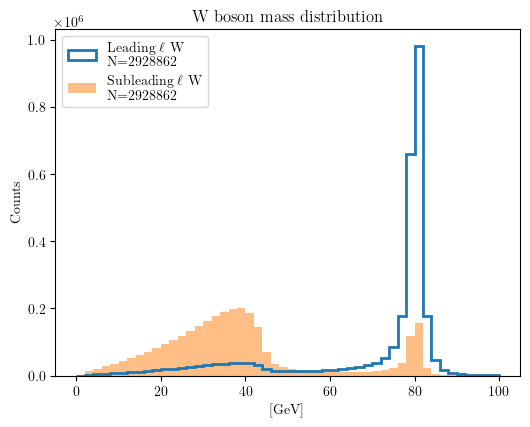

In [120]:
s = 1.5
p,q = 1,1
fig, ax = plt.subplots(nrows=p, ncols=q, figsize = (4*s*p,3*s*q))
ax.hist(LeadingW['m'], bins = 50, range = [0,100], histtype = 'step', lw=2, label = r'Leading $\ell$'+' W\nN={}'.format(len(LeadingW['m'])))
ax.hist(SubleadW['m'], bins = 50, range = [0,100], histtype = 'bar', alpha = 0.5, label = r'Subleading $\ell$'+' W\nN={}'.format(len(SubleadW['m'])))
ax.set_xlabel(r"[GeV]")
ax.set_ylabel(r'Counts')
ax.set_title("W boson mass distribution")
ax.legend(loc=2)
ax.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.show()